# 1 Document Clustering

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

## Question 1

### I

**Write mathematical formulations of the optimization functions of maximum likelihood estimation (MLE) for the document clustering model with complete data and incomplete data, respectively. Then briefly describe why MLE with incomplete data is hard to optimize.**

For the document clustering model, given the complete data, i.e., the set of documents $D=\{d_1, d_2, \dots, d_N\}$ and their corresponding cluster assignments $Z=\{z_1, z_2, \dots, z_N\}$, the goal of maximum likelihood estimation (MLE) is to maximize the likelihood function:
$$
p(d_1, z_1, ..., d_N, z_N) = \prod_{n=1}^{N} \prod_{k=1}^{K} \left( \varphi_{k_n} \prod_{w \in \mathcal{A}} \mu_{k_n,w}^{c(w, d_n)} \right)^{z_{n,k}}
$$
where:
- $N$: the total number of documents in the dataset.
- $K$: the total number of clusters.
- $\varphi_{k_n}$: represents the probability of the $n$-th document belonging to cluster $k$.
- $\mathcal{A}$: the vocabulary of all unique words that appear across the entire document set.
- $\mu_{k_n,w}$: the probability of word $w$ appearing in cluster $k$ for the $n$-th document.
- $c(w, d_n)$: the count of word $w$ in document $d_n$.
- $z_{n,k}$: an indicator variable that equals 1 if document $d_n$ is assigned to cluster $k$, and 0 otherwise.

The log-likelihood for complete data is given by:
$$
\ln p(d_1, z_1, ..., d_N, z_N) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{n,k} \left( \ln \varphi_{k_n} + \sum_{w \in \mathcal{A}} c(w, d_n) \ln \mu_{k_n,w} \right)
$$

In the incomplete data scenario, the cluster assignments $Z$ are not known, making the MLE more complex. We need to maximize the marginal likelihood by summing over all possible cluster assignments:
$$
p(d_1, ..., d_N) = \prod_{n=1}^{N} \sum_{k=1}^{K} \left( \varphi_k \prod_{w \in \mathcal{A}} \mu_{k,w}^{c(w, d_n)} \right)
$$
The log-likelihood for incomplete data is then:
$$
\ln p(d_1, ..., d_N) = \sum_{n=1}^{N} \ln \left( \sum_{k=1}^{K} \varphi_k \prod_{w \in \mathcal{A}} \mu_{k,w}^{c(w, d_n)} \right)
$$

The optimization of MLE with incomplete data is hard to optimize because the log-likelihood function involves a sum over clusters inside a logarithm, making direct maximization non-trivial. This necessitates the use of iterative methods such as the Expectation-Maximization (EM) algorithm to estimate the parameters.

**Briefly explain the high-level idea of the EM algorithm to find MLE parameter estimates.**

The EM algorithm is an iterative method to find the MLE in cases where the data is incomplete or has missing values. It consists of two steps:
1. E-Step (Expectation Step): Calculate the expected value of the complete-data log-likelihood, with respect to the current estimates of the parameters.
2. M-Step (Maximization Step): Maximize this expected log-likelihood to update the parameter estimates.

This algorithm iterates between these two steps until convergence, providing the MLE estimates even in the presence of missing data.

### II

**Derive Expectation and Maximization steps of the (soft)-EM algorithm for Document Clustering, in a markdown cell (ideally using Latex for clean typesetting and show your work in your submitted PDF report.) In particular, include all model parameters that should be learnt and the exact expression (using the same math convention that we saw in the Module 4) that should be used to update these parameters during the learning process (ie., E-step, M-step and assignments).**

The $Q$ function is defined as the expected value of the complete-data log-likelihood with respect to the conditional distribution of the latent variables, given the observed data and current parameter estimates.
$$
Q(\theta, \theta^{\text{old}}) = \sum_{n=1}^{N} \sum_{k=1}^{K} p(z_{n,k} = 1 \mid d_n, \theta^{\text{old}}) \ln p(z_{n,k} = 1, d_n \mid \theta)
$$
Substitute the joint probability:
$$
p(z_{n,k} = 1, d_n \mid \theta) = \varphi_k \prod_{w \in \mathcal{A}} \mu_{k,w}^{c(w, d_n)}
$$
So the $Q$ function becomes:
$$
Q(\theta, \theta^{\text{old}}) = \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{n,k}) \left( \ln \varphi_k + \sum_{w \in \mathcal{A}} c(w, d_n) \ln \mu_{k,w} \right)
$$
Where:
- $\gamma(z_{n,k})=p(z_{n,k} = 1 \mid d_n, \theta^{\text{old}})$ is the probability that document $d_n$ belongs to cluster $k$ given the current parameter estimates.

The posterior probability $\gamma(z_{n,k})$ for document $d_n$ belonging to cluster $k$ is given by:
$$
\gamma(z_{n,k}) = p(z_{n,k} = 1 | d_n, \theta) = \frac{p(z_{n,k} = 1) \cdot p(d_n | z_{n,k} = 1, \theta)}{p(d_n | \theta)}
$$
Here, the components are defined as follows:
1. Prior probability $p(z_{n,k} = 1)$ is the mixing coefficient for cluster $k$:
$$
p(z_{n,k} = 1) = \varphi_k
$$
2. Likelihood $p(d_n | z_{n,k} = 1, \theta)$ is the probability of observing document $d_n$ given it belongs to cluster $k$:
$$
p(d_n | z_{n,k} = 1, \theta) = \prod_{w \in \mathcal{A}} \mu_{k,w}^{c(w, d_n)}
$$
3. Marginal probability $p(d_n | \theta)$ is the probability of observing document $d_n$ under all clusters:
$$
p(d_n | \theta) = \sum_{j=1}^{K} p(z_{n,j} = 1) \cdot p(d_n | z_{n,j} = 1, \theta)
$$

The complete expression for $\gamma(z_{n,k})$:
$$
\gamma(z_{n,k}) = \frac{\varphi_k \cdot \prod_{w \in \mathcal{A}} \mu_{k,w}^{c(w, d_n)}}{\sum_{j=1}^{K} \varphi_j \cdot \prod_{w \in \mathcal{A}} \mu_{j,w}^{c(w, d_n)}}
$$

To maximize the $Q$ function with respect to the parameters $\varphi_k$ and $\mu_{k,w}$, we need to introduce constraints:
1. Constraint on mixing coefficients: $\sum_{k=1}^K\varphi_k=1$
2. Constraint on word proportion: $\sum_{w\in \mathcal{A}}\mu_{k,w}=1$

We use the Lagrange multipliers method to incorporate these constraints. 
$$
\mathcal{L}(x, \lambda_1, \dots, \lambda_m) = f(x) - \lambda_1 g_1(x) - \dots - \lambda_m g_m(x)
$$
Where $\lambda_i$ is called Lagrange multipliers and $g_i(x)$ is the constraint.

Setting the derivative of $\mathcal{L}$ with respect to $\varphi_k$ to zero:
$$
\frac{\partial \mathcal{L}}{\partial \varphi_k} = 0
$$
Solving for $\varphi_k$:
$$
\varphi_k = \frac{N_k}{N}, \quad \text{where } N_k = \sum_{n=1}^{N} \gamma(z_{n,k})
$$

Setting the derivative of $\mathcal{L}$ with respect to $\mu_{k,w}$ to zero:
$$
\frac{\partial \mathcal{L}}{\partial \mu_{k,w}} = 0
$$
Solving for $\mu_{k,w}$:
$$
\mu_{k,w} = \frac{\sum_{n=1}^{N} \gamma(z_{n,k}) c(w, d_n)}{\sum_{w' \in \mathcal{A}} \sum_{n=1}^{N} \gamma(z_{n,k}) c(w', d_n)}
$$


EM Algorithm:
1. Initialization: Set initial values for parameters $\theta^{\text{old}}=(\varphi^{\text{old}}, \mu_1^{\text{old}}, \dots, \mu_K^{\text{old}})$.
2. E-Step: Compute the posterior probability $\gamma(z_{n,k})$.
3. M-Step: Update parameters $\varphi_k$ and $\mu_{k,w}$ using the formulas derived.
4. Convergence Check: Repeat E and M steps until convergence.

### III

**Load Task2A.txt file (if needed, perform text preprocessing similar to what we did in Activity 4.2).**

In [2]:
# Load the file
with open('Task2A.txt', 'r') as file:
    text = file.readlines()

# Split each line into label and article based on the tab character ('\t')
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])
docs.label = docs.label.astype('category')

In [3]:
tfidf = TfidfVectorizer(
    lowercase=True,         # Convert all text to lowercase    
    stop_words='english',   # Remove common English stop words (e.g., 'the')
    min_df=0.01,            # Ignore terms that appear in less than 1% of the documents
    max_df=0.8,             # Ignore terms that appear in more than 80% of the documents
    ngram_range=(1,1),      # Use unigrams (single words) only
    norm='l2',              # Apply L2 normalization to the resulting TF-IDF vectors
    max_features=1000       # Limit the vocabulary to the top 1000 terms based on TF-IDF score
)

# Fit the TF-IDF model
features = tfidf.fit_transform(raw_documents=docs.article.values).toarray()

### IV

**Implement the EM algorithm (derived in Chapter 5 of Module 4). Please provide enough comments in your submitted code.**

In [4]:
class EM:

    def __init__(self, K, tau_max=200, epsilon=0.01, hard_em=False, random_state=None):
        self.K = K # Number of GMM clusters
        self.tau_max = tau_max # Max number of iterations
        self.epsilon = epsilon # Minimum acceptable error rate
        self.hard_em = hard_em # Use Hard-EM if True, otherwise use Soft-EM
        self.random_state = random_state
        np.random.seed(self.random_state)

    def get_params(self, deep=False):
        return {
            'K': self.K,
            'tau_max': self.tau_max,
            'epsilon': self.epsilon,
            'clustering type': 'hard' if self.hard_em else 'soft',
            'random_state': self.random_state
        }

    def __str__(self):
        params = self.get_params()
        return 'EM({0})'.format(','.join(['='.join([key, str(params[key])]) for key in params.keys()]))

    def __repr__(self):
        return self.__str__()

    def fit(self, X):
        N, D = X.shape # N = number of samples, D = number of features
        
        # Initialization
        self.Psi_hat_ = np.array([1/self.K] * self.K) # Initialize mixing coefficients uniformly
        self.Mu_hat_ = X[np.random.choice(N, size=self.K, replace=False)] # Randomly choose K samples as initial cluster means
        self.Mu_hat_ /= self.Mu_hat_.sum(axis=1, keepdims=True)
        r = np.zeros((N, self.K)) # Initialize posterior probability matrix
        t = np.zeros((N, self.K)) # Initialize a temporary matrix for log-likelihood calculations

        terminate = False
        tau = 0 # Iteration counter
        Mu_hat_old = self.Mu_hat_ # Store the previous iteration's cluster means

        # EM algorithm loop: iterate until convergence or maximum iterations are reached
        while not terminate:
            # E-Step
            for k in range(self.K):
                # Transform the equation into log form
                t[:, k] = np.log(self.Psi_hat_[k]) + (X @ np.log(self.Mu_hat_[k] + 1e-10)) # Prevent log(0)

            # Apply the log-sum-exp trick
            c = np.max(t, axis=1, keepdims=True)
            r = np.exp(t - c - np.log(np.sum(np.exp(t - c), axis=1, keepdims=True)))

            if self.hard_em:
                # Create hard assignments
                hard_assignments = np.zeros((N, self.K))
                # Assign 1 to the most likely cluster (highest probability) for each data point
                hard_assignments[np.arange(N), np.argmax(r, axis=1)] = 1
                r = hard_assignments
            else:
                # Ensure the sum of probabilities for each data point equals 1
                r /= r.sum(axis=1, keepdims=True) # Normalize
            
            # M-step: Update the parameters based on the posterior probabilities calculated in the E-step
            self.Nk_hat_ = r.sum(axis=0)
            self.Psi_hat_ = self.Nk_hat_ / N
            # Update cluster means using the weighted average of samples
            self.Mu_hat_ = (r.T @ X) / self.Nk_hat_.reshape((-1, 1))

            # Increment iteration counter
            tau += 1
            # Check termination condition: convergence or maximum iterations reached
            terminate = (tau == self.tau_max) or np.allclose(self.Mu_hat_, Mu_hat_old, rtol=self.epsilon)
            # Update old cluster means for next iteration comparison
            Mu_hat_old = self.Mu_hat_

        return self
    
    def predict_proba(self, X):
        N, D = X.shape  # N = number of documents, D = number of terms
        r = np.zeros((N, self.K)) # Initialize posterior probability matrix
        t = np.zeros((N, self.K))
        
        for k in range(self.K):
            t[:, k] = np.log(self.Psi_hat_[k]) + (X @ np.log(self.Mu_hat_[k] + 1e-10))

        # Apply the log-sum-exp trick
        c = np.max(t, axis=1, keepdims=True)

        r = np.exp(t - c - np.log(np.sum(np.exp(t - c), axis=1, keepdims=True)))
            
        r /= r.sum(axis=1, keepdims=True)
        return r

    def predict(self, X):
        probs = self.predict_proba(X) # Get the posterior probabilities
        preds = np.argmax(probs, axis=1) # Choose the cluster with the highest posterior probability
        return preds

### V

**Set the number of clusters K=4, and run the hard clustering (using hard-EM) and soft clustering (using soft-EM) on the provided data.**

In [5]:
# Hard-EM
hard_em = EM(K=4, tau_max=200, epsilon=0.01, hard_em=True)
hard_em.fit(features)

EM(K=4,tau_max=200,epsilon=0.01,clustering type=hard,random_state=None)

In [6]:
# Soft-EM
soft_em = EM(K=4, tau_max=200, epsilon=0.01, hard_em=False)
soft_em.fit(features)

EM(K=4,tau_max=200,epsilon=0.01,clustering type=soft,random_state=None)

### VI

**Perform a PCA on the clusterings that you get based on the Mixture Models in the same way we did in Activity 4.2. Then, plot the obtained clusters with different colors where x and y axes are the first two principal components (similar to Activity 4.2). Based on your plots, discuss how and why the hard and soft clustering are different in a markdown cell.**

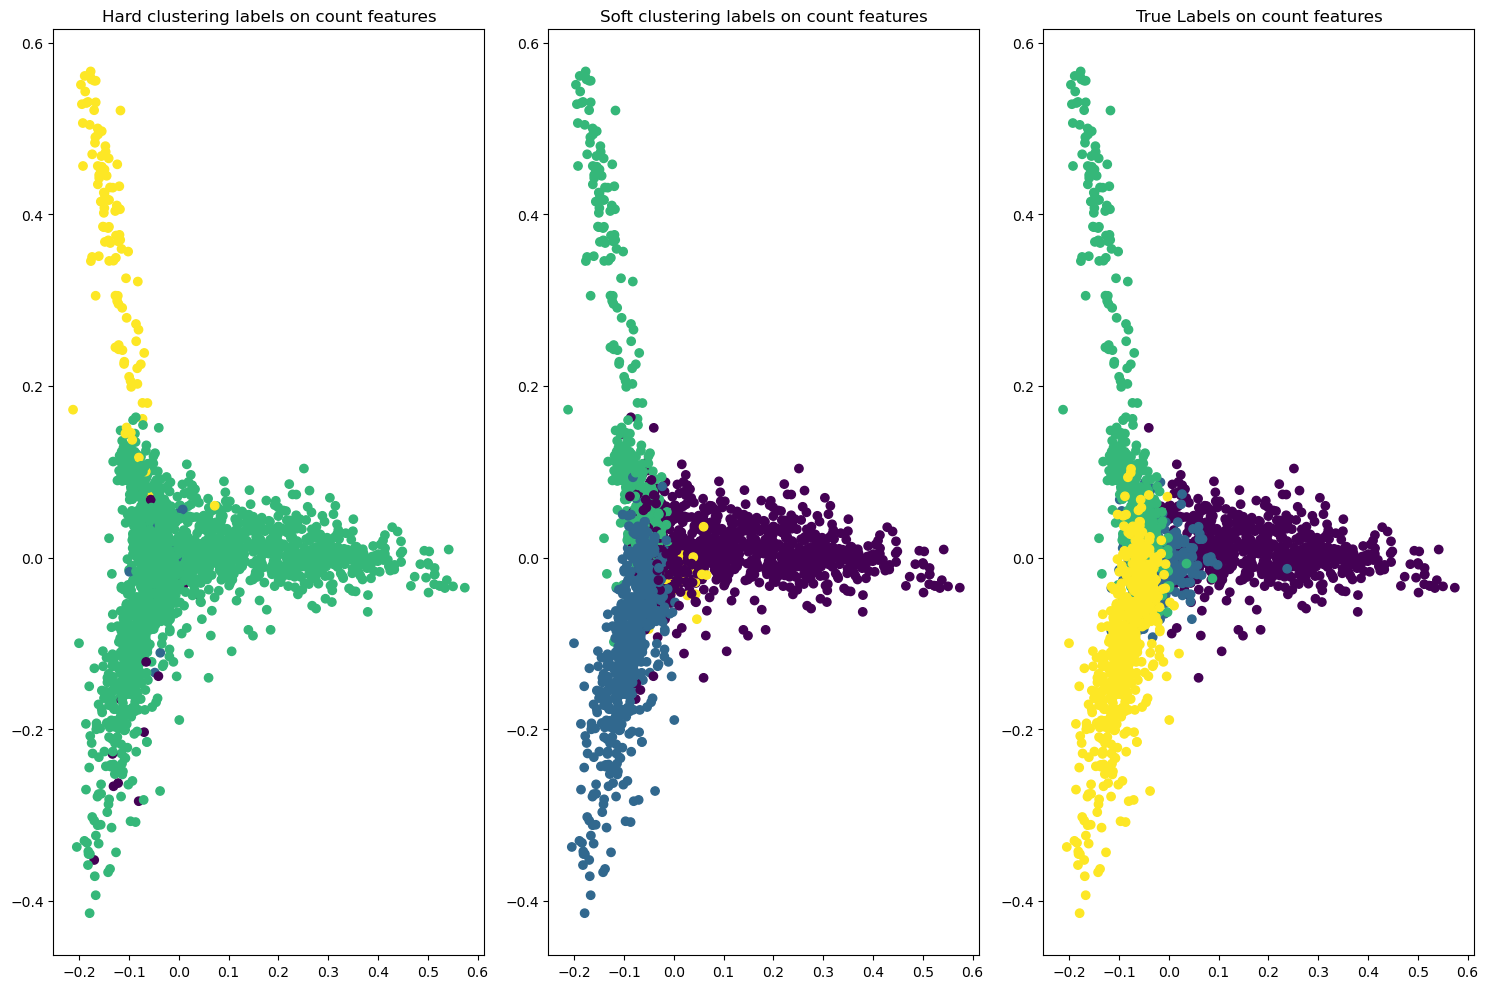

In [7]:
# perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features)

# plot the hard clustering outcome
_, axs = plt.subplots(1, 3, figsize=(15, 10), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=hard_em.predict(features))
axs[0].set_title('Hard clustering labels on count features')

# plot the soft clustering outcome
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=soft_em.predict(features))
axs[1].set_title('Soft clustering labels on count features')

## plot the original data
axs[2].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[2].set_title('True Labels on count features')

plt.show()

Differences between hard and soft clustering:

1. Boundaries:
- In hard clustering, data points are forced into distinct clusters, which may result in sharp boundaries between clusters, even in regions where the data is overlapping, as we can see very clear segmentation in the left plot.
- In soft clustering, boundaries are more fluid because each point has a probability of belonging to multiple clusters. This better reflects the uncertainty in the data, as seen in the middle plot, where many points lie between clusters.

2. Handling of ambiguous points:
- Hard clustering struggles with points that are near the boundary between clusters, as it must assign them definitively to one cluster. This might lead to misclassifications if the data is overlapping, which can be observed in the left plot where certain regions seem overly simplistic.
- Soft clustering, on the other hand, handles ambiguity better by assigning probabilities, capturing the true complexity in the data. This is particularly evident in the middle plot, where points are not strictly assigned to one cluster, showing a more nuanced representation.

3. Cluster assignment
- In hard clustering, cluster assignment is binary (0 or 1) for each point, making it less flexible when dealing with data points that do not perfectly belong to any cluster.
- In soft clustering, each point is represented by a probability vector indicating the likelihood that the point belongs to each cluster, giving a better model of real-world situations where data may not prefectly fit into categories.

The core difference lies in how each method approaches the problem of clustering:
- Hard clustering makes clear decisions about each point, which works well when clusters are clearly separable and the goal is strict categorization.
- Soft clustering acknowledges that clusters can have fuzzy boundaries and that some points may belong to more than one group with different degrees of uncertainty. This is often a better fit for data that has overlap.